In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Dien_Tam_Do

/content/drive/MyDrive/Colab Notebooks/Dien_Tam_Do


In [ ]:
# infor of GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Apr 29 01:12:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import cv2
import numpy as np
import keras
import pickle
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Flatten, Dense, Dropout
from keras.layers import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random
import os
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from keras.models import  load_model
import time
import tensorflow as tf
from datetime import datetime



ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [ ]:
# Khai báo
X_train=[]
y_train=[]
X_test=[]
y_test=[]

In [ ]:
# Biến thay đổi
# 100 - 0.5 - 32 sai lop 1
# 100 - 0.3 - 64:96%test lớp 1 0.7test 0.8train đẹp
# 100 - 0.3 - 32:97% lớp 1 0.6test 0.56train thua
# 100 - 0.4 -32: 96% lớp 1 0.78test 0.84train đẹp hơn
# 100 - 0.4 - 64: 98% lớp 1 thấp
num_epochs = 100
num_drop = 0.5
batch_size = 64

In [ ]:
X_train = np.load("X_train_image.npy")
X_test = np.load("X_test_image.npy")
y_train = np.load("y_train_image.npy")
y_test = np.load("y_test_image.npy")

In [ ]:
encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

for (i,lab) in enumerate(encoder.classes_):
    print("{}.{}".format(i+1,lab))

1.F
2.N
3.Q
4.S
5.V


In [ ]:
base_model = VGG16(input_shape=(128,128,3),weights='imagenet', include_top=False)
    # Dong bang cac layer 4
for layer in base_model.layers:
        layer.trainable = False
    # Them cac layer FC va Dropout
x = Flatten(name='flatten')(base_model.output)
x = Dense(4096, activation='relu', name='fc1')(x)
#x = BatchNormalization()(x) không tăng độ chính xác
x = Dropout(num_drop)(x)
x = Dense(4096, activation='relu', name='fc2')(x)
#x = BatchNormalization()(x)
x = Dropout(num_drop)(x)
x = Dense(5, activation='softmax', name='predictions')(x)
    # Compile
my_model = Model(base_model.input, x)

my_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

print(my_model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [ ]:
my_model = keras.utils.plot_model(my_model, "my_first_model.png")

In [ ]:
filepath="best_weight/weights-{epoch:02d}-{val_accuracy:.2f}-100-0.5-64.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
# callbacks = [EarlyStopping(monitor='val_loss', patience=8),
#              ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]
start = datetime.now().time()

history = my_model.fit(
  X_train,y_train,
  validation_data=(X_test,y_test),
  epochs=num_epochs,verbose=2,
  batch_size=batch_size,
  callbacks=callbacks_list
)


Epoch 1/100
581/581 - 110s - loss: 1.0573 - accuracy: 0.9441 - val_loss: 0.2805 - val_accuracy: 0.9214

Epoch 00001: val_accuracy improved from -inf to 0.92142, saving model to best_weight/weights-01-0.92-100-0.5-64.hdf5
Epoch 2/100
581/581 - 72s - loss: 0.1893 - accuracy: 0.9597 - val_loss: 0.5299 - val_accuracy: 0.8881

Epoch 00002: val_accuracy did not improve from 0.92142
Epoch 3/100
581/581 - 72s - loss: 0.1713 - accuracy: 0.9625 - val_loss: 0.2010 - val_accuracy: 0.9446

Epoch 00003: val_accuracy improved from 0.92142 to 0.94459, saving model to best_weight/weights-03-0.94-100-0.5-64.hdf5
Epoch 4/100
581/581 - 72s - loss: 0.1337 - accuracy: 0.9704 - val_loss: 0.2722 - val_accuracy: 0.9278

Epoch 00004: val_accuracy did not improve from 0.94459
Epoch 5/100
581/581 - 72s - loss: 0.1544 - accuracy: 0.9638 - val_loss: 0.1930 - val_accuracy: 0.9534

Epoch 00005: val_accuracy improved from 0.94459 to 0.95343, saving model to best_weight/weights-05-0.95-100-0.5-64.hdf5
Epoch 6/100
581/5

In [ ]:
my_model.save("models/model_SV_VGG16-100-0.5-64.h5")
np.save("my_history_thu2(100-0.5-64).npy", history.history)
# print("Thoi gian chay", datetime.now().time()-start)

In [ ]:
test_loss, test_acc = my_model.evaluate(X_test, y_test,batch_size=64, verbose=2) 
print("Acc:",test_acc * 100)
print("Loss:",test_loss)

273/273 - 21s - loss: 0.2841 - accuracy: 0.9592
Acc: 95.91625928878784
Loss: 0.2840767800807953


In [ ]:
model = tf.keras.models.load_model('best_weight/weights-10-0.97-100-0.4-64.hdf5')
print("predicting....")
pre_test = model.predict(X_test)
pre_train = model.predict(X_train)

encoder = LabelBinarizer()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

y_pre_test= np.argmax(pre_test,axis=1)
y_test_category = np.argmax(y_test,axis=1)

In [ ]:
!pip install scikit-plot
import scikitplot as skplt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predicting test data....


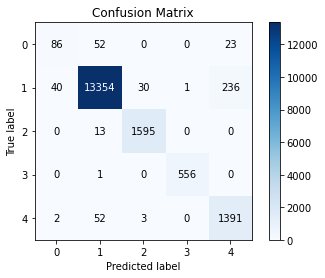

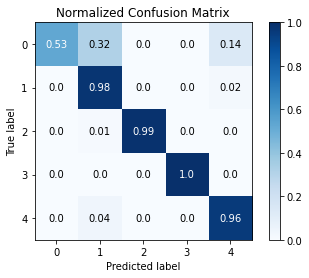

0.9740177803269285
predicting train data....


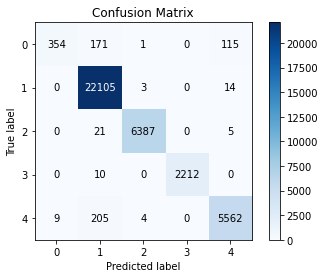

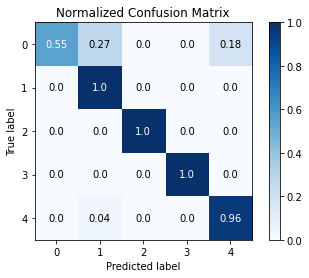

0.9849911237828823


In [ ]:
# Vẽ chuẩn bị

skplt.metrics.plot_confusion_matrix(y_test_category, y_pre_test, normalize=False)
skplt.metrics.plot_confusion_matrix(y_test_category, y_pre_test, normalize=True)

print("predicting test data....")
plt.show()
print(accuracy_score(y_test_category, y_pre_test))


#====================================

y_pre_train = np.argmax(pre_train,axis=1)
y_train_category = np.argmax(y_train,axis=1)

# Vẽ chuẩn bị

skplt.metrics.plot_confusion_matrix(y_train_category, y_pre_train, normalize=False)
skplt.metrics.plot_confusion_matrix(y_train_category, y_pre_train, normalize=True)

print("predicting train data....")

plt.show()
print(accuracy_score(y_train_category, y_pre_train))


0.9740177989006042
0.9902361631393433


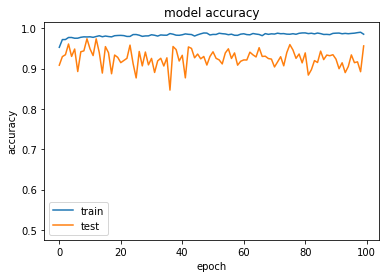

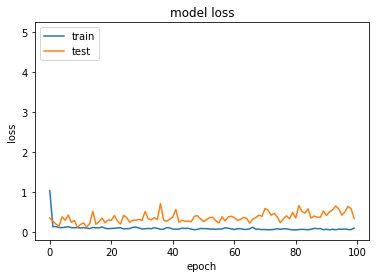

In [ ]:
history_model = np.load("my_history_thu2(100-0.4-64).npy",allow_pickle='True').item()

print(np.max(history_model['val_accuracy']))
print(np.max(history_model['accuracy']))

# summarize history for accuracy

plt.plot(history_model['accuracy'])
plt.plot(history_model['val_accuracy'])
plt.plot([0.5])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower left')
plt.show()

# summarize history for loss

plt.plot(history_model['loss'])
plt.plot(history_model['val_loss'])
plt.plot([5.0])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Predictor


In [8]:
model = keras.models.load_model('model_100-0.4-32/weights-99-0.96-100-0.4-32.hdf5')

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

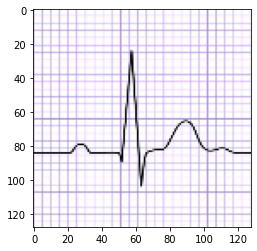

V 100.0


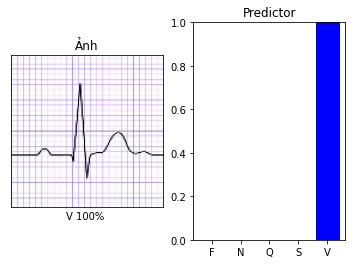

In [ ]:
from matplotlib import pyplot as plt
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Dien_Tam_Do/anh4.png")
image = cv2.resize(image, (128,128))
image = tf.keras.preprocessing.image.array_to_img(image)
plt.imshow(image)
plt.show()
ima = np.expand_dims(image, axis=0)
images = np.vstack([ima])
# print("predicting....")

pre_test = model.predict(images)
class_cu = ["F","N","Q","S","V"]
print(class_cu[np.argmax(pre_test[0])],100 * np.max(pre_test[0]))

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Ảnh')
plt.xticks([])
plt.yticks([])
plt.imshow(image, cmap=plt.cm.binary)
plt.xlabel("{} {:2.0f}% ".format(class_cu[np.argmax(pre_test[0])],100 * np.max(pre_test[0])))


ax = fig.add_subplot(1, 2, 2)
ax.set_title('Predictor')
thisplot = plt.bar(class_cu, pre_test[0], color="#777777" )
plt.ylim([0, 1])
predicted_label = np.argmax(pre_test[0])
thisplot[predicted_label].set_color('blue')

    
plt.show()

In [ ]:
train_generator = ImageDataGenerator(rotation_range = 7,
                                     horizontal_flip = True, shear_range = 0.2,
                                     height_shift_range = 0.07, zoom_range = 0.2)

#crop_images


In [ ]:
pip install opencv-python

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Dien_Tam_Do/MicrosoftTeams-image (1).png")
ynhay = 65
xnhay = 80
for y in range(10, 430, ynhay):
  for x in range(30, 800, xnhay):
    crop_img = img[y:y+ynhay, x:x+xnhay]
    plt.imshow(crop_img)
    plt.show()


#Show the image with matplotlib

# cv2.imshow("nghia", img)

In [ ]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/Dien_Tam_Do/MicrosoftTeams-image (5).png")
import numpy as np
from PIL import Image
import PIL.ImageOps   

BLACK_MIN = np.array([0, 0, 0],np.uint8)
BLACK_MAX = np.array([255, 255, 80],np.uint8)
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
frame_threshed = cv2.inRange(hsv_img, BLACK_MIN, BLACK_MAX)
cv2.imwrite('threshed.jpg', frame_threshed)
image = Image.open('threshed.jpg')
inverted_image = PIL.ImageOps.invert(image)
inverted_image.save('invert.jpg')
img2=cv2.imread("invert.jpg")
# cv2.imshow('image1', img2)

In [ ]:
ls


drive/  sample_data/
